In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
df = pd.read_csv('AAPL.csv')

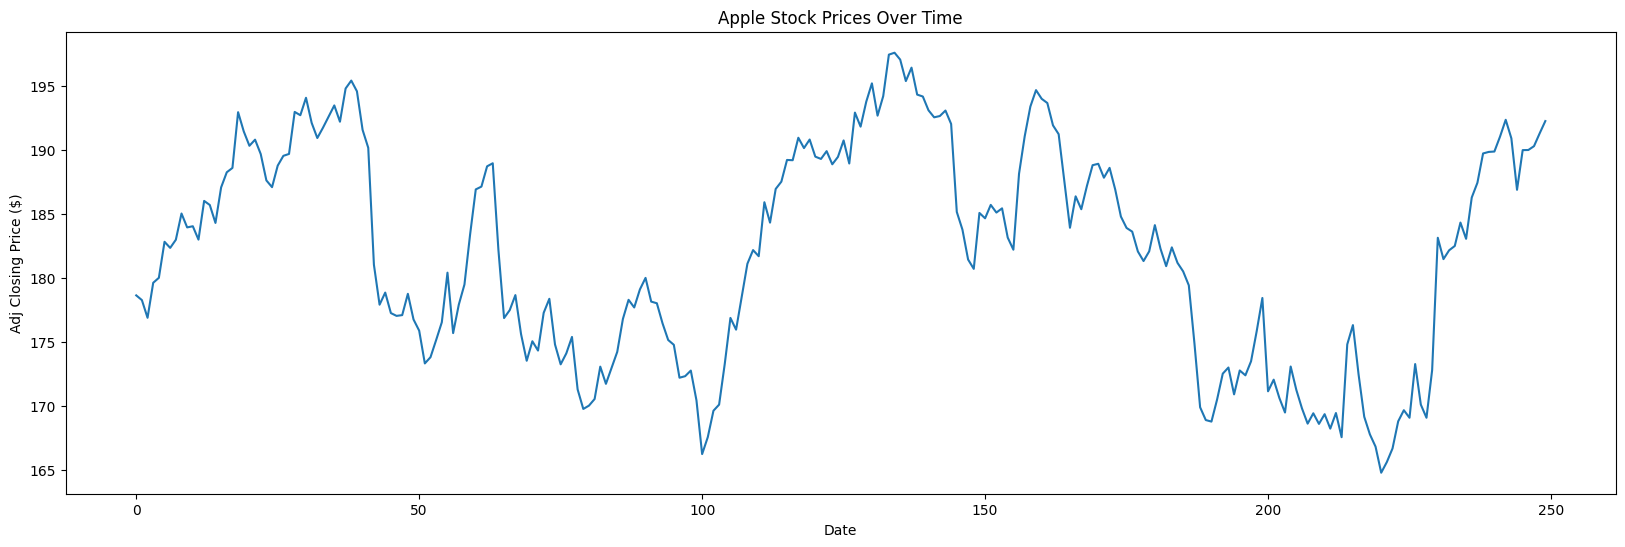

In [3]:
df['Date'] = pd.to_datetime(df.Date)
plt.figure(figsize=(20, 6))
plt.plot(df["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adj Closing Price ($)")
plt.title("Apple Stock Prices Over Time")
plt.show()

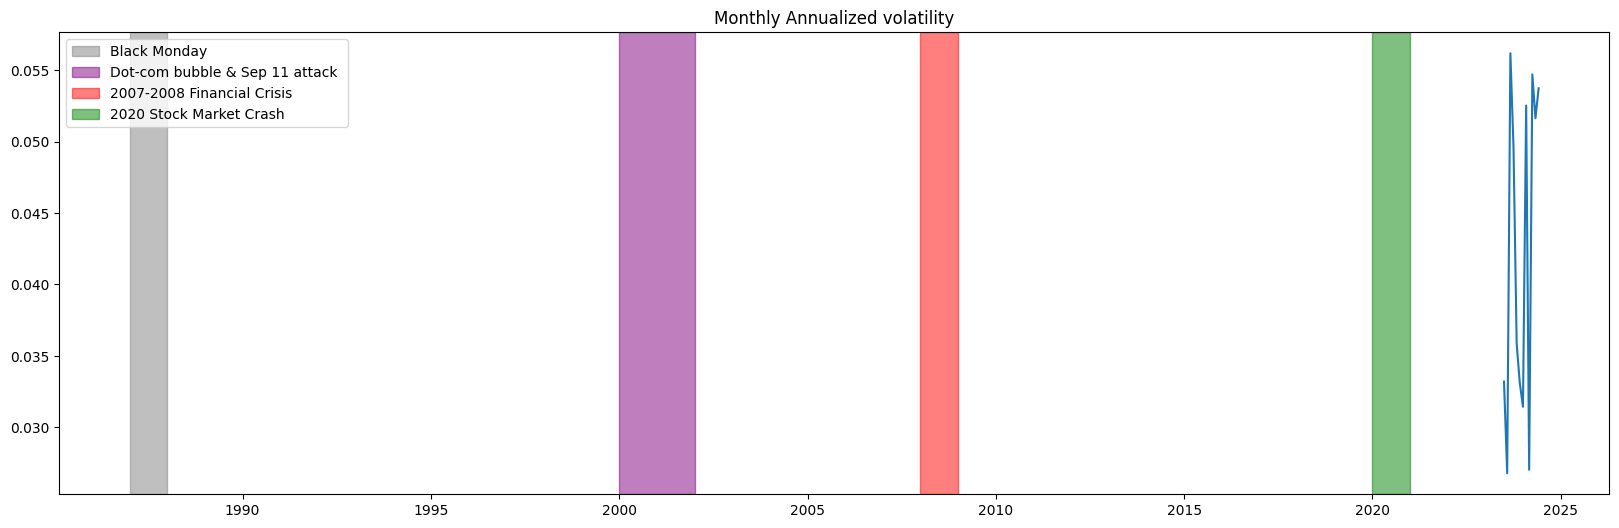

In [4]:
# Set interceptate column as the index
newdf=df.set_index('Date')

#To model returns we will use daily % change
daily = newdf['Adj Close'].pct_change()
daily.dropna(inplace = True)

#Resample returns per month and take STD as measure of volatility
monthly=daily.resample("M").std()*np.sqrt(12)

import matplotlib.patches as mpatches

#Visulize major market events show up in the volatility
plt.figure(figsize=(20, 6))
plt.plot(monthly)
plt.axvspan('1987','1988',color='grey',alpha=.5)
plt.axvspan('2000','2002',color='purple',alpha=.5)
plt.axvspan('2008','2009',color='r',alpha=.5)
plt.axvspan('2020','2021',color='g',alpha=.5)
plt.title("Monthly Annualized volatility")
l1=mpatches.Patch(color='grey',alpha=.5, label="Black Monday")
l2=mpatches.Patch(color='purple',alpha=.5, label="Dot-com bubble & Sep 11 attack ")
l3=mpatches.Patch(color='red',alpha=.5, label="2007-2008 Financial Crisis")
l4=mpatches.Patch(color='green',alpha=.5, label="2020 Stock Market Crash")
plt.legend(handles=[l1,l2,l3,l4])

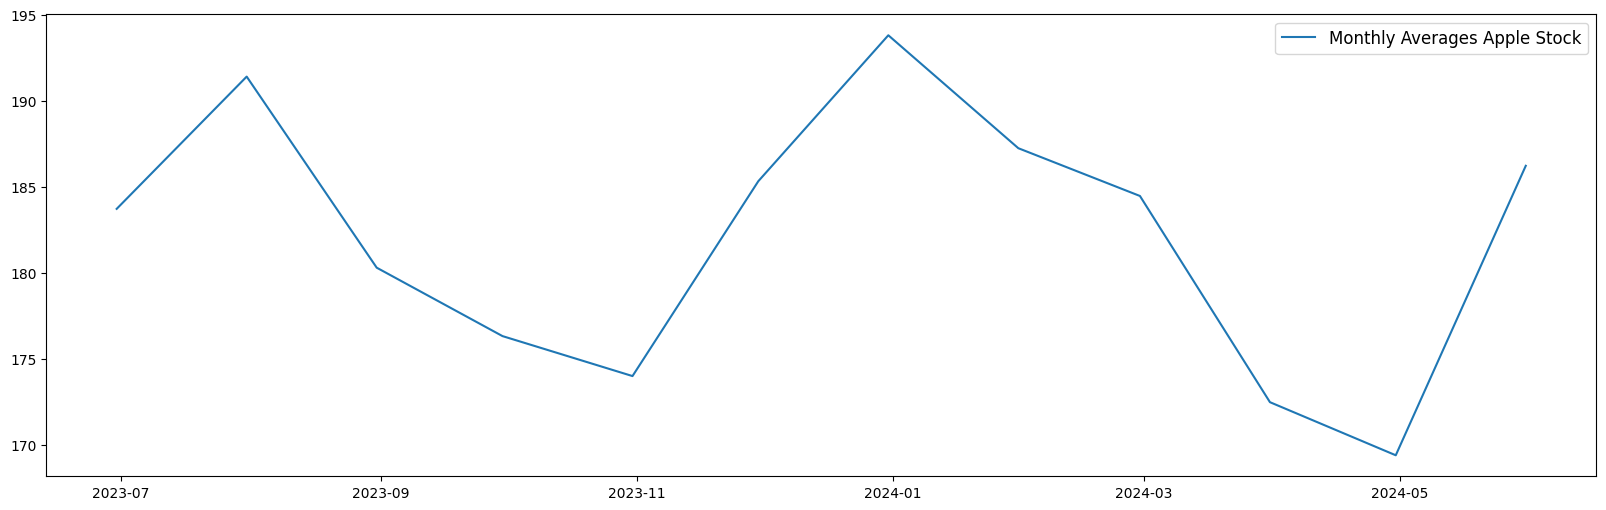

In [5]:
# Resample the data to the monthly level
monthly_mean = newdf['Adj Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
##Monthly Stock Price 
fig = plt.figure(figsize=(20,6))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.legend(prop={'size': 12})
plt.show()

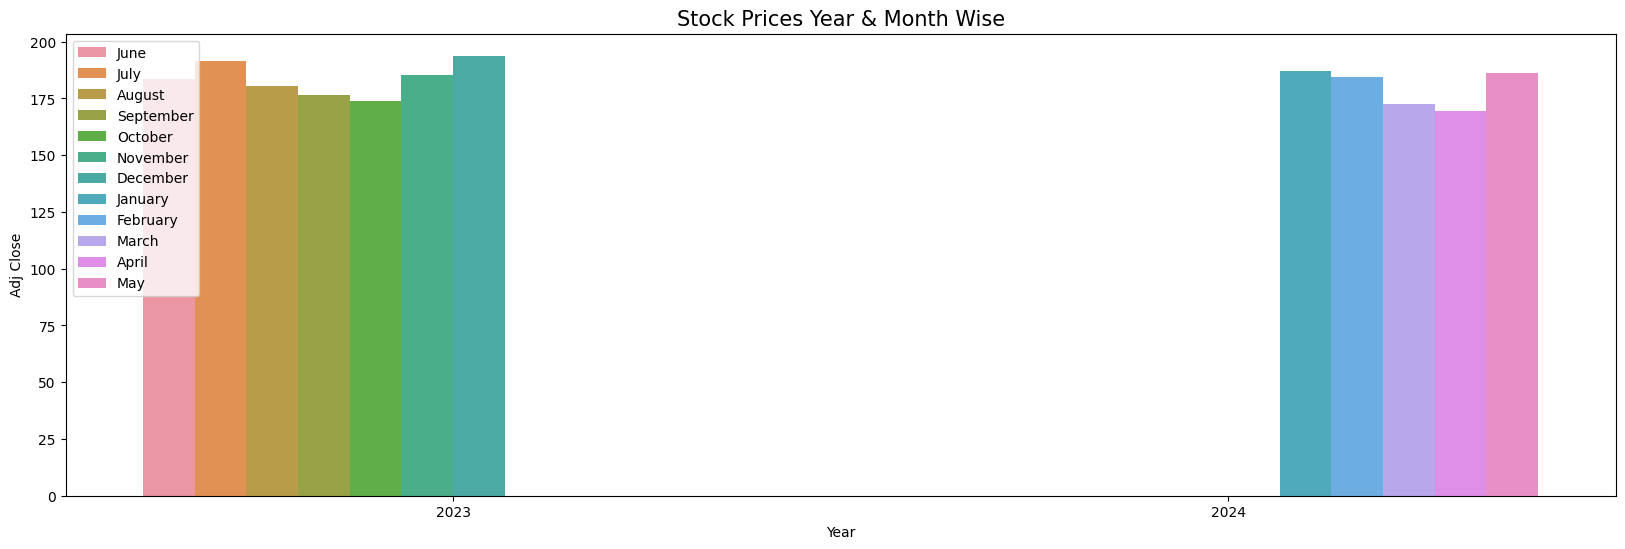

In [6]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['Quarter'] = monthly_data.index.quarter
fig, ax = plt.subplots(figsize=(20,6))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

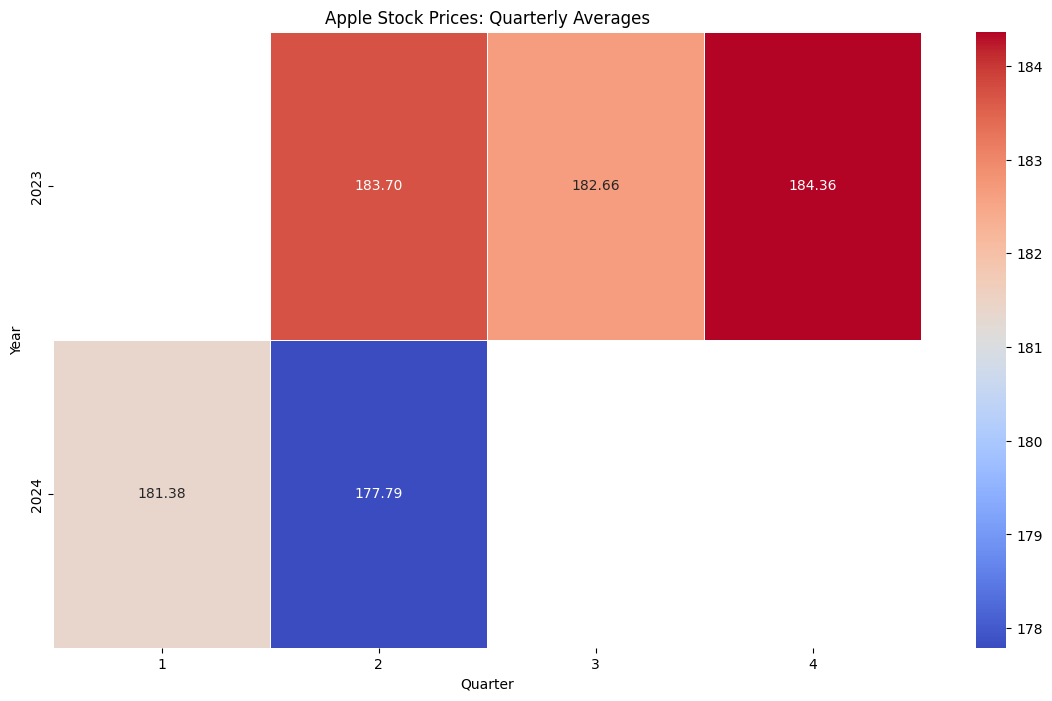

In [7]:
quarter = monthly_data.groupby(["Year", "Quarter"])["Adj Close"].mean().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(quarter, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Apple Stock Prices: Quarterly Averages")
plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

plt.figure(figsize=(30,12))
decomposed_series = sd(monthly_data['Adj Close'])
decomposed_series.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)

<Figure size 3000x1200 with 0 Axes>